In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
features = pd.read_csv('features.csv',sep=',')

In [3]:
features

,Name,Date,Ep_Count,Age_Rating,Cast,Network,Genres,Tags,Score
0,Move to Heaven,2021,10,18+,"['Lee Je Hoon', 'Tang Jun Sang', 'Hong Seung H...",Netflix,"['Life', 'Drama', 'Family']","['Uncle-Nephew Relationship', 'Autism', 'Death...",9.2
1,Flower of Evil,2020,16,15+,"['Lee Joon Gi', 'Moon Chae Won', 'Jang Hee Jin...",tvN,"['Thriller', 'Romance', 'Crime', 'Melodrama']","['Married Couple', 'Deception', 'Family Secret...",9.1
2,Hospital Playlist,2020,12,15+,"['Jo Jung Suk', 'Yoo Yeon Seok', 'Jung Kyung H...","Netflix, tvN","['Friendship', 'Romance', 'Life', 'Medical']","['Multiple Mains', 'Best Friends', 'Slow Roman...",9.1
3,Hospital Playlist 2,2021,12,15+,"['Jo Jung Suk', 'Yoo Yeon Seok', 'Jung Kyung H...","Netflix, tvN","['Friendship', 'Romance', 'Life', 'Medical']","['Workplace', 'Strong Friendship', 'Best Frien...",9.1
4,My Mister,2018,16,15+,"['Lee Sun Kyun', 'IU', 'Park Ho San', 'Song Sa...",tvN,"['Psychological', 'Life', 'Drama', 'Family']","['Nice Male Lead', 'Strong Female Lead', 'Smar...",9.1
...,...,...,...,...,...,...,...,...,...
653,Love Returns,2017,120,15+,"['Lee Sung Yeol', 'Pyo Ye Jin', 'Lee Dong Ha',...",KBS1,"['Romance', 'Drama', 'Family', 'Melodrama']","['Character Development', 'Organ Transplantati...",7.5
654,"Hyde, Jekyll, Me",2015,20,15+,"['Hyun Bin', 'Han Ji Min', 'Sung Joon', 'Lee H...",SBS,"['Psychological', 'Comedy', 'Romance', 'Drama']","['Dissociative Identity Disorder', 'Double Ide...",7.5
655,The Queen of Office,2013,16,13+,"['Oh Ji Ho', 'Kim Hye Soo', 'Jung Yu Mi', 'Jeo...",KBS2,"['Business', 'Comedy', 'Romance', 'Drama']","['Arrogant Male Lead', 'Food Industry', 'Contr...",7.5
656,My Little Baby,2016,16,13+,"['Oh Ji Ho', 'Lee Soo Kyung', 'Kim Min Jae', '...",MBC,"['Comedy', 'Romance', 'Family']","['Neighbors', 'Character Development', 'Broman...",7.5


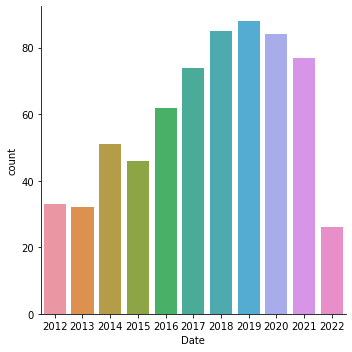

In [4]:
#Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.catplot(x='Date',data=features,kind='count',hue=None)

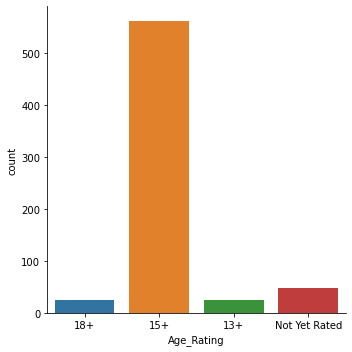

In [5]:
sns.catplot(x='Age_Rating',data=features,kind='count',hue=None)

In [6]:
features['Network'].value_counts()

tvN                             117
SBS                             107
KBS2                            100
MBC                              96
OCN                              42
jTBC                             42
Netflix,  tvN                    28
jTBC,  Netflix                   19
Netflix                          17
KBS1                              8
jTBC,  Viki                       8
Netflix,  SBS                     7
iQiyi,  jTBC                      5
TV Chosun                         4
KBS2,  Netflix                    4
MBC,  Netflix                     3
Netflix,  OCN                     3
SBS,  Viki                        3
Daum Kakao TV,  Netflix           3
iQiyi,  tvN                       3
TV Chosun,  Viki                  3
15 min.                           2
50 min.                           2
iQiyi,  SBS                       2
iQiyi,  MBC                       2
Naver TV Cast,  tvN               2
jTBC,  Naver TV Cast,  vLive      2
KBS2,  Viki                 

In [7]:
#web scraping returned some weird networks, i.e. "30 min, 60 min"
#this is to clean everything up

def clean_networks(network):
    network_list = ['KBS1','KBS2','TV Chosun','tvN','Netflix','MBC','SBS','OCN','jTBC']
    for n in network_list:
        if(n in network):
            return n
    return 'tvN' #if no network found, returns the most popular one (tvN)

features['Network'] = features['Network'].apply(clean_networks)
features['Network'].value_counts()

tvN          159
SBS          115
KBS2         109
MBC          104
jTBC          61
Netflix       52
OCN           43
KBS1           8
TV Chosun      7
Name: Network, dtype: int64

In [8]:
#view different genres
def convert_to_list(string):
    new_list = []
    str_words = string[1:-1].split(',')
    for item in str_words:
        tmp = item.strip().replace("'",'')
        new_list.append(tmp)
    return new_list

list_columns = ['Genres','Tags','Cast']
for column in list_columns:
    features[column] = features[column].apply(convert_to_list)

In [9]:
for taglist in features['Tags']:
    taglist.remove('(Vote or add tags)')

<AxesSubplot:ylabel='Genre'>

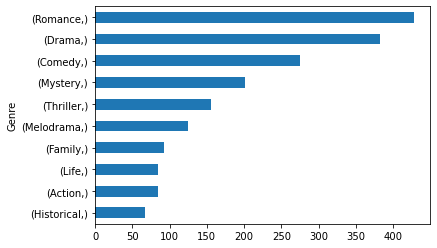

In [10]:
#Take a look at some of the most popular tags/genres
genre_list = []
for genrelist in features['Genres']:
    genre_list.extend(genrelist)

genre_counts = DataFrame(genre_list,columns=['Genre']).value_counts()[:10].sort_values(ascending=True) #top 10 genres
genre_counts.plot(kind='barh')

<AxesSubplot:ylabel='Tags'>

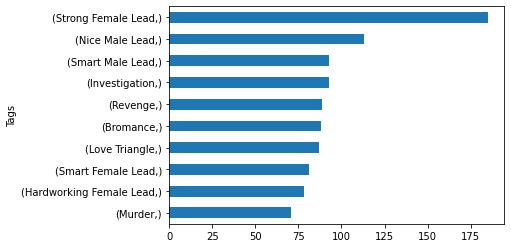

In [11]:
tag_list = []
for taglist in features['Tags']:
    tag_list.extend(taglist)

tag_counts = DataFrame(tag_list,columns=['Tags']).value_counts()[:10].sort_values(ascending=True) #top 10 tags
tag_counts.plot(kind='barh')

<AxesSubplot:ylabel='Cast'>

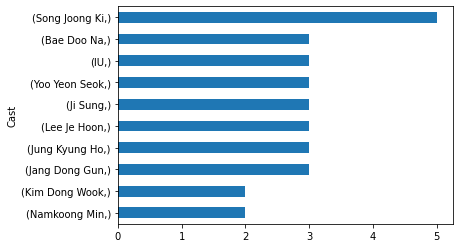

In [12]:
cast_list = [] 
for castlist in features['Cast'][:100]: #check cast for top 100 movies (find the big names in kdrama industry)
    cast_list.extend(castlist[:2]) #actors 0->2 are usually those in the main roles

cast_counts = DataFrame(cast_list,columns=['Cast']).value_counts()[:10].sort_values(ascending=True) #top 10 actors/actresses
cast_counts.plot(kind='barh')

In [13]:
#Content-Based Recommendation System
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
from nltk.corpus import stopwords

In [14]:
#combine cast, genre, and tag into a single sentence
def combine(lis):
    new_str = ''
    for item in lis:
        new_str += item.replace(' ','')
        new_str += ' '
    return new_str[:-1]

def normalize(message):
    nopunc = [char for char in message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
#test
print(combine(features['Cast'].iloc[0]))

LeeJeHoon TangJunSang HongSeungHee JungSukYong JungYoungJoo LeeMoonShik


In [16]:
features['Cast_combined'] = features['Cast'].apply(combine)
features['Genre_combined'] = features['Genres'].apply(combine)
features['Tags_combined'] = features['Tags'].apply(combine)

In [17]:
tfidf = TfidfVectorizer(analyzer=normalize)

tfidf_cast = tfidf.fit_transform(features['Cast_combined'])
tfidf_genre = tfidf.fit_transform(features['Genre_combined'])
tfidf_tag = tfidf.fit_transform(features['Tags_combined'])

In [35]:
test = 'Crash Landing on You'
index = features[features['Name'] == test].index.values[0]

In [41]:
cos_sim_cast = cosine_similarity(tfidf_cast)
cos_sim_genre = cosine_similarity(tfidf_genre)
cos_sim_tag = cosine_similarity(tfidf_tag)

def get_similarity_ratings(index):
    cast_multiplier, genre_multiplier, tag_multiplier = 1,2,3
    
    similarity_cast = np.array([item*cast_multiplier for item in list(cos_sim_cast[index])])
    similarity_genre = np.array([item*genre_multiplier for item in list(cos_sim_genre[index])])
    similarity_tag = np.array([item*tag_multiplier for item in list(cos_sim_tag[index])])
    
    #add all values together:
    return np.add(np.add(similarity_cast,similarity_genre),similarity_tag)

In [42]:
corr_list = get_similarity_ratings(index)
#normalize values between 0,1 range

def normalize_nums(lis):
    return (lis-np.min(lis))/(np.max(lis)-np.min(lis))

corr_list = normalize_nums(corr_list)

In [43]:
drama_corr = DataFrame(corr_list,columns=['Similarity'])
drama_corr.sort_values(by=['Similarity'],inplace=True,ascending=False)
drama_corr

,Similarity
10,1.000000
217,0.420222
26,0.302872
16,0.239233
113,0.220244
...,...
107,0.000000
538,0.000000
46,0.000000
48,0.000000


In [44]:
#get drama from index,prints out top 5 dramas that are similar

def match_index_to_drama(row):
    return features.iloc[row.index.values]['Name']

drama_corr['Name'] = drama_corr.apply(match_index_to_drama)
drama_corr.drop(drama_corr.loc[drama_corr['Similarity'] == 1].index,inplace=True) #similarity = 1 means same drama

In [45]:
print(drama_corr['Name'].head(5))

217      King2Hearts
26              D.P.
16      Mr. Sunshine
113         Snowdrop
215    Into the Ring
Name: Name, dtype: object
